In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.optimize as opt
plt.rcParams['figure.dpi'] = 100

In [3]:
# The contraining term written as a function, the c1,2,3,4 represent values of the cosine functions
def f_comp(x,y,a,b,c,d,e,f,g,h,c1,c2,c3,c4):
    
    value=.5*(a*x*y+b*x/y+c*y/x+d/(x*y))+e*c1*x+f*c2/x+g*c3*y+h*c4/y
    return value

In [6]:
# Actually plug in random coefficient values into the constraint funtion
def f_simp(v, args):
    a, b, c, d ,e, f, g, h, c1, c2, c3, c4 = args
    return f_comp(v[0],v[1],a,b,c,d,e,f,g,h,c1,c2,c3,c4)

In [52]:
# generate distribution of minimizing x and y values for randomly generated coefficients

# initialize empty arrays for Numerical and Analytic minimum distributions
num_min=[]
ana_min=[]



for x in range(2000):
#     generator new random numbers with constraint for coefficients and cosines
    a=random.uniform(0, 1)
    b=random.uniform(0, 1)
    c=random.uniform(0, 1)
    d=random.uniform(0, 1)
    e=random.uniform(0, np.sqrt(a*b))
    f=random.uniform(0, np.sqrt(c*d))
    g=random.uniform(0, np.sqrt(a*c))
    h=random.uniform(0, np.sqrt(b*d))
    c1=random.uniform(-1, 1)
    c2=random.uniform(-1, 1)
    c3=random.uniform(-1, 1)
    c4=random.uniform(-1, 1)
    
#     Calculate and record analytic minimum that we got
    ana_constraint=pow(a*d,.5)+pow(b*c,.5)+4*pow(a*b*c*d,.25)
    ana_min.append(ana_constraint)
    
#     Guess starting points for minimization
    x_m=pow(c*d/(a*b),.25)
    y_m=pow(b*d/(a*c),.25)

#     minimize the function of with random values using a guess of x_m, y_m from overleaf document
    min_val=opt.minimize(lambda x: f_simp(x, (a, b, c, d,e,f,g,h,c1,c2,c3,c4)),(x_m,y_m),bounds=((.0000001,np.inf),(.0000001,np.inf)))
# #     record values for numerical min
    num_min.append(min_val.fun)

Text(0, 0.5, 'Percentage of Trials')

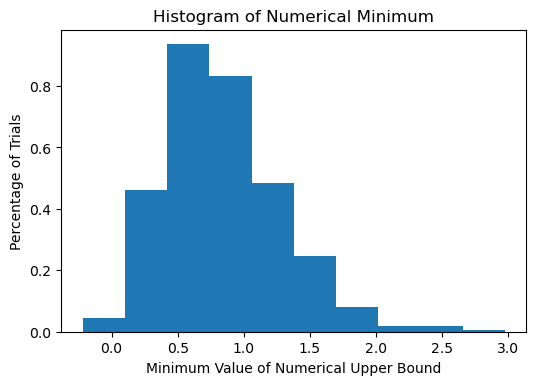

In [53]:
plt.hist(num_min,density=True)
plt.title('Histogram of Numerical Minimum')
plt.xlabel('Minimum Value of Numerical Upper Bound')
plt.ylabel('Percentage of Trials')

Text(0, 0.5, 'Percentage of Trials')

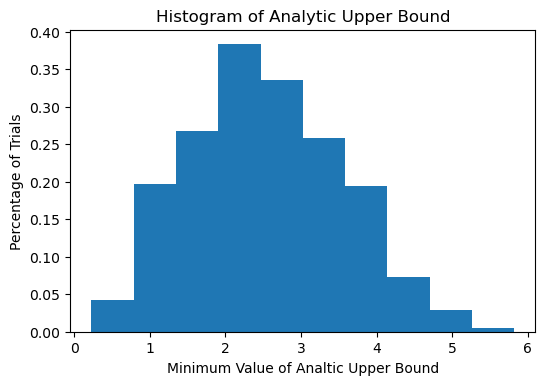

In [56]:
plt.hist(ana_min,density=True)
plt.title('Histogram of Analytic Upper Bound')
plt.xlabel('Minimum Value of Analtic Upper Bound')
plt.ylabel('Percentage of Trials')

Text(0, 0.5, 'Percentage of Trials')

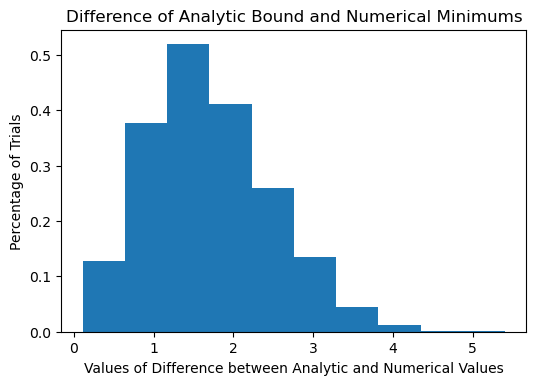

In [57]:
plt.hist(np.array(ana_min)-np.array(num_min),density=True)
plt.title('Difference of Analytic Bound and Numerical Minimums')
plt.xlabel('Values of Difference between Analytic and Numerical Values')
plt.ylabel('Percentage of Trials')

In [65]:
# Want to check how the upper bound affects the mean difference

max_abcd=[]
avg_diff=[]

for n in range(1,21):
    max_abcd.append(n)
    
    # initialize empty arrays for Numerical and Analytic minimum distributions
    num_min_n=[]
    ana_min_n=[]

    for x in range(2000):
#     generator new random numbers with constraint for coefficients and cosines
        a=random.uniform(0, n)
        b=random.uniform(0, n)
        c=random.uniform(0, n)
        d=random.uniform(0, n)
        e=random.uniform(0, np.sqrt(a*b))
        f=random.uniform(0, np.sqrt(c*d))
        g=random.uniform(0, np.sqrt(a*c))
        h=random.uniform(0, np.sqrt(b*d))
        c1=random.uniform(-1, 1)
        c2=random.uniform(-1, 1)
        c3=random.uniform(-1, 1)
        c4=random.uniform(-1, 1)
    
#     Calculate and record analytic minimum that we got
        ana_constraint=pow(a*d,.5)+pow(b*c,.5)+4*pow(a*b*c*d,.25)
        ana_min_n.append(ana_constraint)
    
#     Guess starting points for minimization
        x_m=pow(c*d/(a*b),.25)
        y_m=pow(b*d/(a*c),.25)

#     minimize the function of with random values using a guess of x_m, y_m from overleaf document
        min_val=opt.minimize(lambda x: f_simp(x, (a, b, c, d,e,f,g,h,c1,c2,c3,c4)),(x_m,y_m),bounds=((.0000001,np.inf),(.0000001,np.inf)))
# #     record values for numerical min
        num_min_n.append(min_val.fun)
    diff=np.array(ana_min_n)-np.array(num_min_n)
    avg_diff.append(np.mean(diff))
    


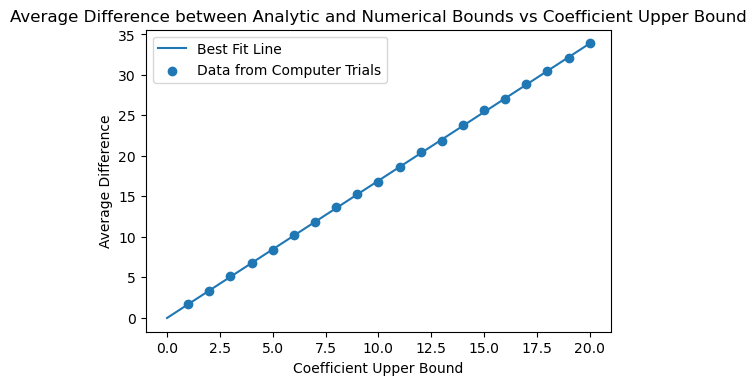

In [66]:
plt.scatter(max_abcd,avg_diff,label='Data from Computer Trials')
plt.title('Average Difference between Analytic and Numerical Bounds vs Coefficient Upper Bound')
plt.xlabel('Coefficient Upper Bound')
plt.ylabel('Average Difference')
a, b = np.polyfit(max_abcd, avg_diff, 1)
plt.plot(t,a*t+b,label='Best Fit Line')
plt.legend()

In [76]:
a

1.6956267342038318

In [61]:
from sklearn.metrics import r2_score 
predict=a*np.array(max_abcd)+b
R_square = r2_score(avg_diff, predict)
print(R_square)

0.9996348761875811
